In [1]:
import import_ipynb
import Scanpy_functions_v03262021 as sc_pipe
import scvelo as scv
scv.logging.print_version()
import warnings
import scirpy as ir
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import bbknn
import logging
from sklearn.mixture import GaussianMixture
from scipy.stats     import norm
import glob
import os
import hvplot.pandas
import docx
from docx import Document
from docx.shared import Inches
from docx.shared import Pt
from scipy import sparse
import scanpy.external as sce
import holoviews as hv
import panel as pn
import bokeh
from bokeh.resources import INLINE
import scanorama
import gseapy

importing Jupyter notebook from Scanpy_functions_v03262021.ipynb
Running scvelo 0.2.5.dev5+g1805ab4 (python 3.8.12) on 2022-06-17 15:02.
Running scvelo 0.2.5.dev5+g1805ab4 (python 3.8.12) on 2022-06-17 15:03.


In [2]:

In_path = '/user/ifrec/liuyuchen/scRNASeq_DATA/Akira_Fukusima_scRNASeq/'

out_path = '/user/ifrec/liuyuchen/Analysis_Reports/Akira_Fukusima_scRNASeq/human/'

In [3]:
#sc.set_figure_params(scanpy=True, dpi=200,  figsize=[12.8,9.6])
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization


In [4]:
adata =sc.read_h5ad(out_path+'/human_merged_0602.h5ad')

In [5]:
#human = sc.read_h5ad(out_path+'/human_ingested_label_all_sample.h5ad')
mouse = sc.read_h5ad('/user/ifrec/liuyuchen/Analysis_Reports/Akira_Fukusima_scRNASeq/mouse_labeled.h5ad')

In [6]:
mouse

AnnData object with n_obs × n_vars = 93597 × 15620
    obs: 'Sample', 'batch', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet_score', 'n_counts', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'log_counts', 'leiden', 'Conditions', 'Organ', 'Cell_Type', 'SatM_like', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'velocity_self_transition', 'S_score', 'G2M_score', 'phase', 'clusters_gradients', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'Defined_groups'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_nor

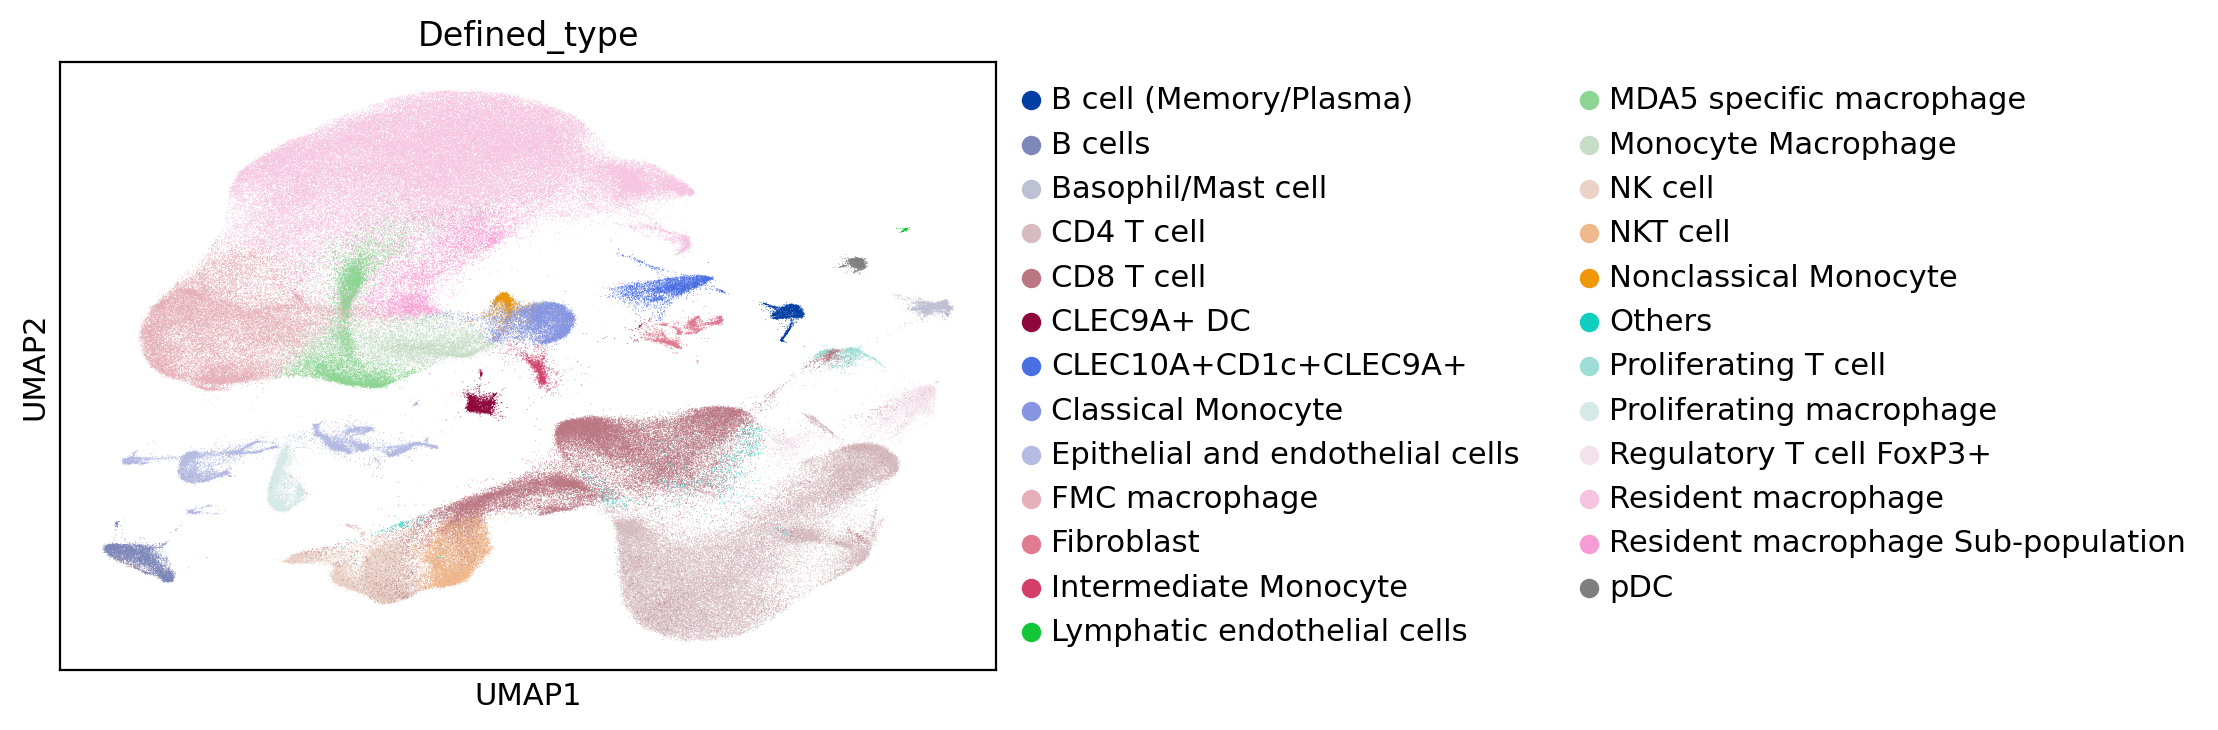

In [7]:
sc.pl.umap(adata, color = 'Defined_type')

In [8]:
mouse.obs['Defined_groups'].value_counts()

Resident macrophage                  16214
B cell                               15030
Others                               14096
T cell                                8625
Endothelial cells                     5439
FMF like macrophage                   5043
Neutrophil                            4904
Ly6c high monocyte                    4348
Fibroblast                            3417
Intersitial macrophage                3056
Ly6c low monocyte                     2365
cDC                                   2264
NK cell                               2031
Monocyte/macrophage                   1882
Lung SatM like cell                   1649
pDC                                   1080
Smooth muscle cell                     886
Type1 and regenerative epithelium      746
BAL SatM like cell                     522
Name: Defined_groups, dtype: int64

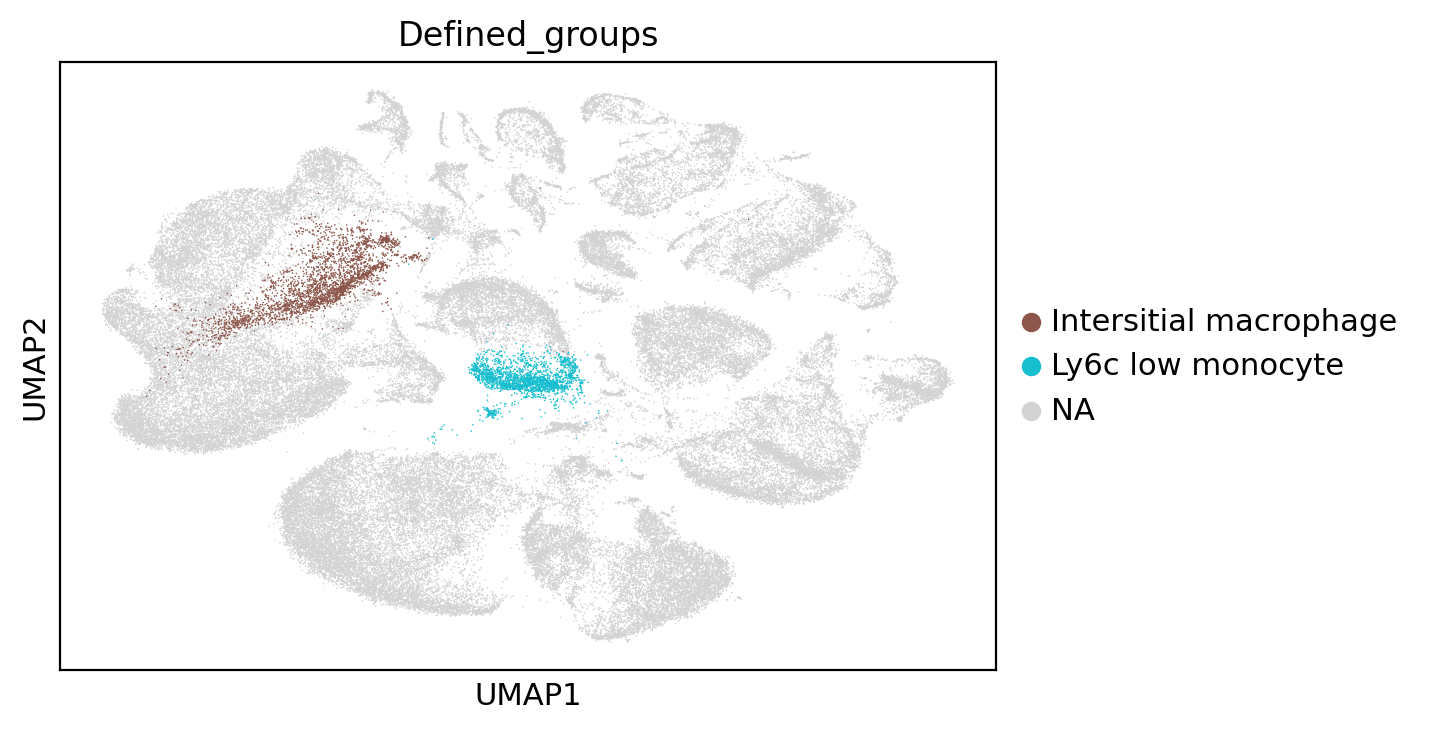

In [9]:
sc.pl.umap(mouse, color = 'Defined_groups',groups=['Intersitial macrophage','Ly6c low monocyte'])

In [10]:

ad_ref = mouse.copy()
ad_ingest = adata.copy()


In [11]:
sc.pp.pca(ad_ref)
sc.pp.neighbors(ad_ref)

In [12]:
var_names = ad_ref.var_names.intersection(ad_ingest.var_names)
ad_ref = ad_ref[:, var_names]
ad_ingest= ad_ingest[:, var_names]
sc.tl.ingest(ad_ingest, ad_ref, obs='Defined_groups')
adata.obs['Mouse_refered']  = ad_ingest.obs['Defined_groups']


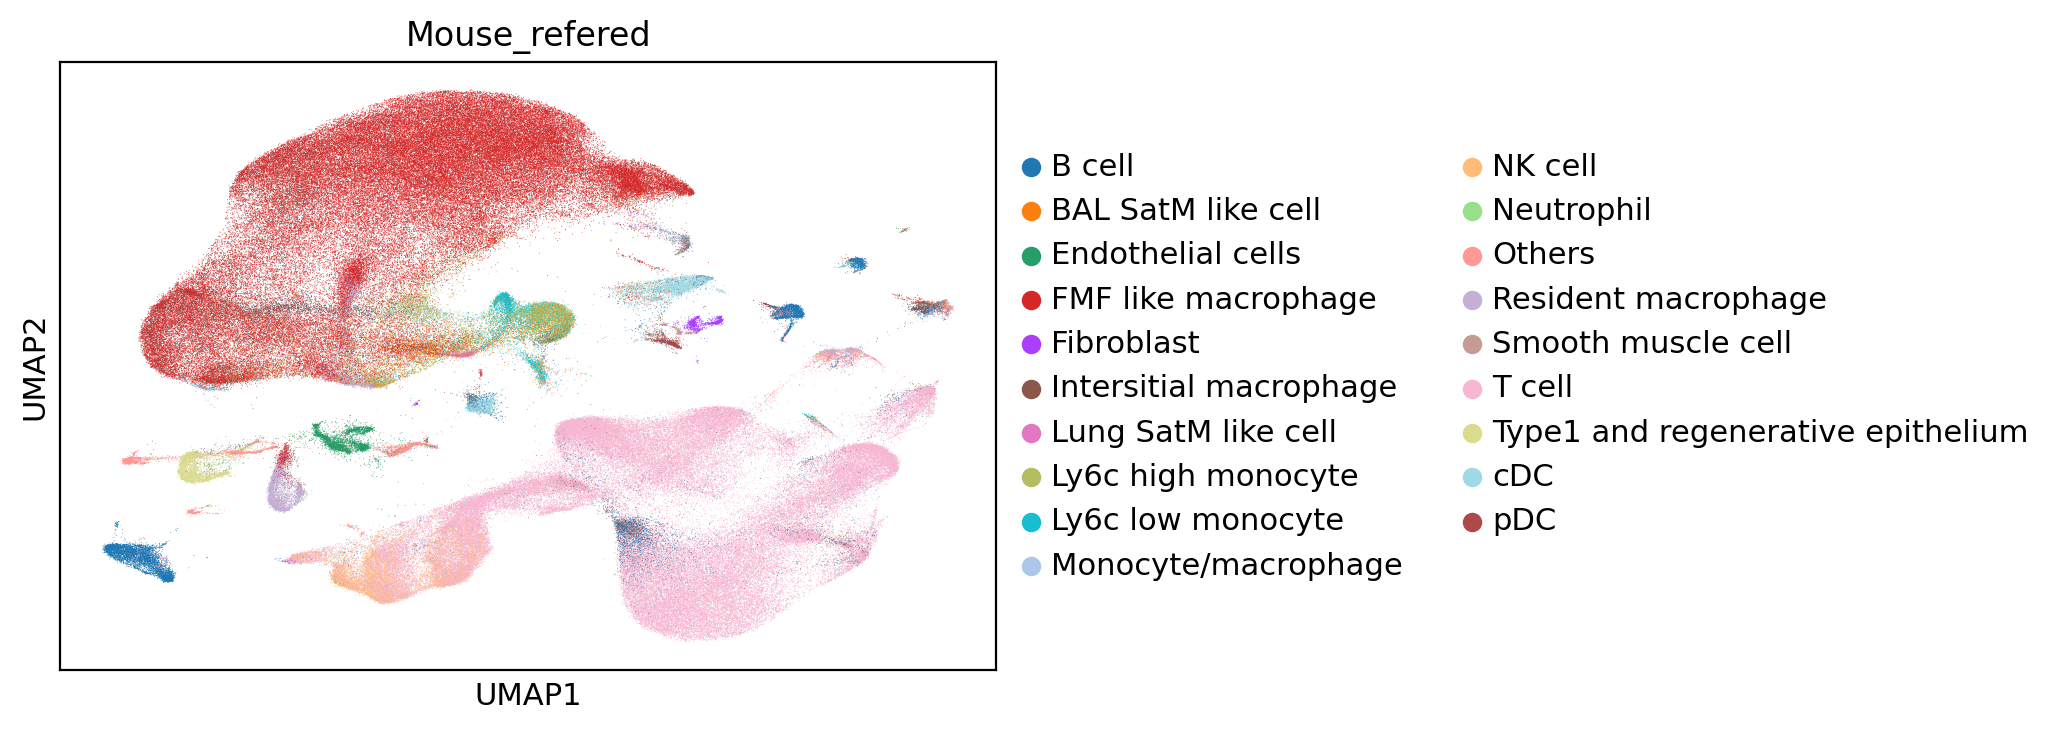

In [13]:
sc.pl.umap(adata,color='Mouse_refered')

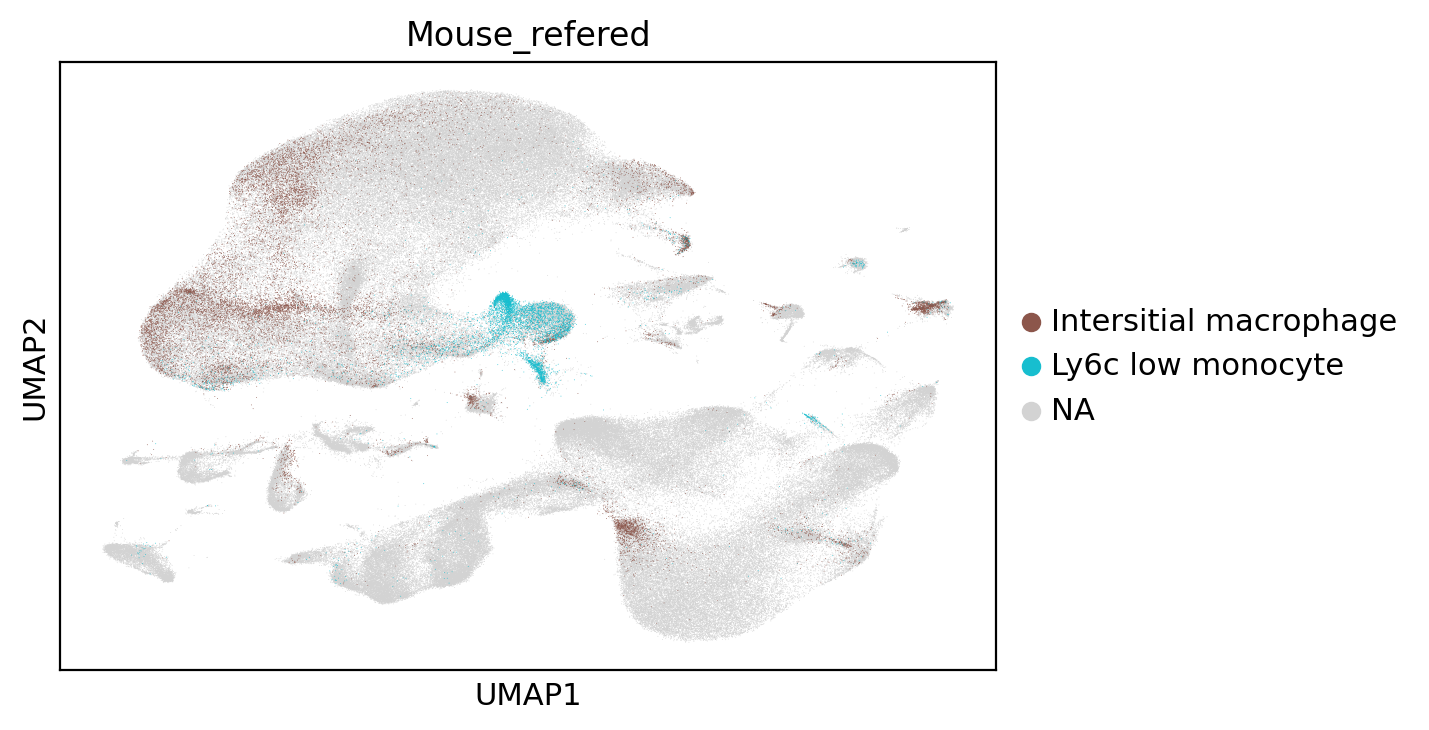

In [14]:
sc.pl.umap(adata,color='Mouse_refered',groups=['Intersitial macrophage','Ly6c low monocyte'])

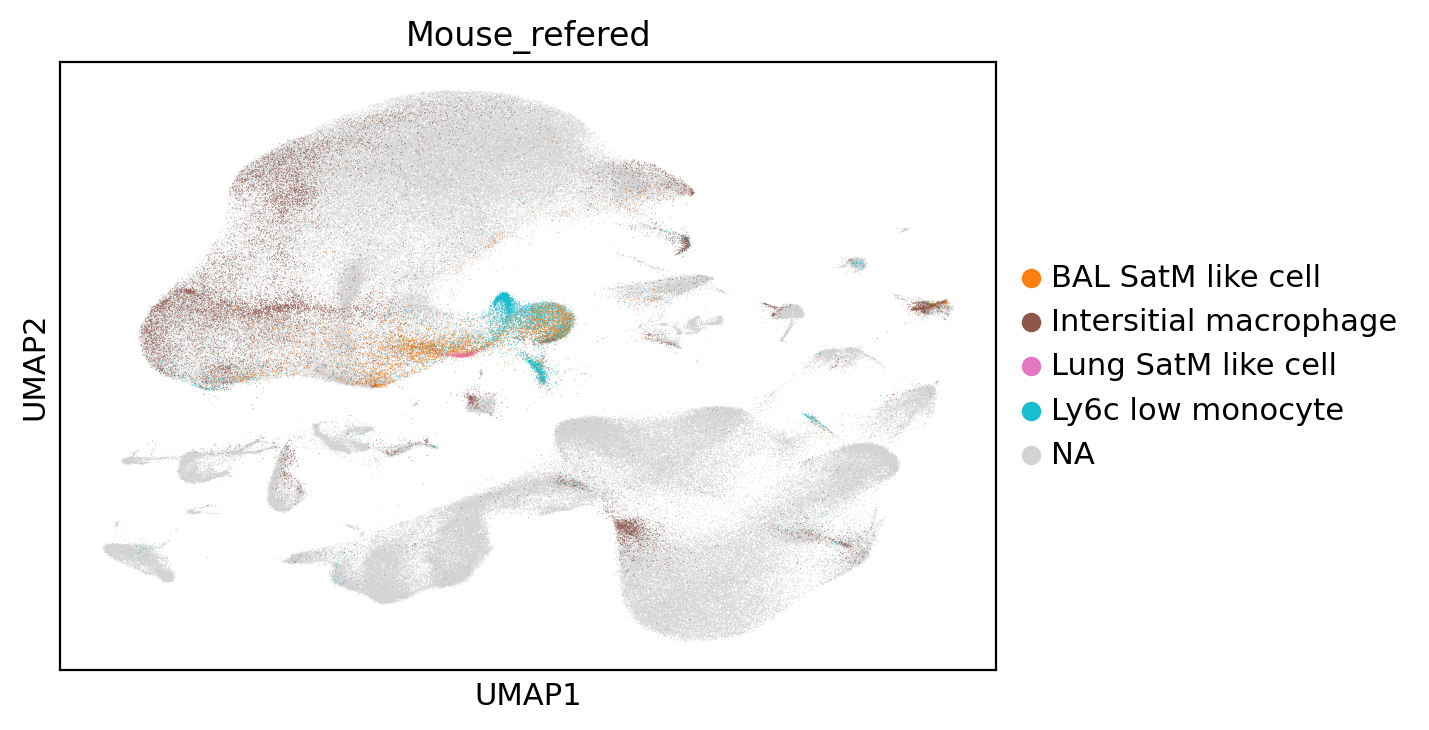

In [15]:
sc.pl.umap(adata,color='Mouse_refered',groups=['Intersitial macrophage','Ly6c low monocyte','Lung SatM like cell','BAL SatM like cell'])

In [16]:
adata.write_h5ad(out_path+'/human_ingested_label.h5ad')

In [17]:
from pyBCS import scanpy2bcs
scanpy2bcs.format_data(out_path+'/human_ingested_label.h5ad', out_path+'/human_label_ingested_0617.bcs',
                        input_format="h5ad", graph_based="leiden")

Writing main/metadata/metalist.json
Cannot convert Sample to numeric, treating as categorical
Cannot convert leiden to numeric, treating as categorical
Cannot convert Cell_Type to numeric, treating as categorical
Cannot convert Defined_type to numeric, treating as categorical
Cannot convert Monocyte_factors to numeric, treating as categorical
Cannot convert CD14_binary to numeric, treating as categorical
Cannot convert FCGR3A_binary to numeric, treating as categorical
Cannot convert CCR2_binary to numeric, treating as categorical
Cannot convert CX3CR1_binary to numeric, treating as categorical
Cannot convert Tcell_factors to numeric, treating as categorical
Cannot convert CD8A_binary to numeric, treating as categorical
Cannot convert CD3E_binary to numeric, treating as categorical
Cannot convert Mouse_refered to numeric, treating as categorical
"predicted_doublet" is not numeric or categorical, ignoring
Found graph based clustering in metadata with keyword leiden
Writing main/metadata/

'/user/ifrec/liuyuchen/Analysis_Reports/Akira_Fukusima_scRNASeq/human//human_label_ingested_0617.bcs'